# Data preprocessing - Yelp Reviews study case
The project consists in developing a service that allows companies to quickly obtain useful summaries of their reviews on these websites.

## Importing Libraries
We import the main libraries for handling and visualizing massive data.

In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install nltk
%pip install plotly
%pip install wordcloud
%pip install openpyxl
%pip install xlrd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk # imports the natural language toolkit
nltk.download('punkt')
nltk.download('stopwords')
import string
import plotly
from nltk.stem import PorterStemmer

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to C:\Users\Ismenia
[nltk_data]     Guevara\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ismenia
[nltk_data]     Guevara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Loading Data
We load a large dataset from a CSV file using pandas.

In [2]:
# Cargar datos desde un archivo CSV
ruta_csv = 'sdata.csv' 
try:
    datos = pd.read_csv(ruta_csv, nrows=5000)
    print('Datos cargados correctamente')
    print(datos.head())

    AllReviews = datos['text']
    AllReviews.head()
except Exception as e:
    print(f'Error al cargar los datos: {e}')

Datos cargados correctamente
                review_id                 user_id             business_id  \
0  vkVSCC7xljjrAI4UGfnKEQ  bv2nCi5Qv5vroFiqKGopiw  AEx2SYEUJmTxVVB18LlCwA   
1  n6QzIUObkYshz4dz2QRJTw  bv2nCi5Qv5vroFiqKGopiw  VR6GpWIda3SfvPC-lg9H3w   
2  MV3CcKScW05u5LVfF6ok0g  bv2nCi5Qv5vroFiqKGopiw  CKC0-MOWMqoeWf6s-szl8g   
3  IXvOzsEMYtiJI0CARmj77Q  bv2nCi5Qv5vroFiqKGopiw  ACFtxLv8pGrrxMm6EgjreA   
4  L_9BTb55X0GDtThi6GlZ6w  bv2nCi5Qv5vroFiqKGopiw  s2I_Ni76bjJNK9yG60iD-Q   

   stars        date                                               text  \
0      5  2016-05-28  Super simple place but amazing nonetheless. It...   
1      5  2016-05-28  Small unassuming place that changes their menu...   
2      5  2016-05-28  Lester's is located in a beautiful neighborhoo...   
3      4  2016-05-28  Love coming here. Yes the place always needs t...   
4      4  2016-05-28  Had their chocolate almond croissant and it wa...   

   useful  funny  cool  
0       0      0     0  
1      

## Exercise 1
Give an example of a question we might be able to answer with this sort of data, and another question that we'd need additional data to answer. Assume for now
that all of the reviews are coming from one business.

### Answer:
Question what can we answer answer data:
- What is the average lengths of the reviews in phrases number?

Question for which we would need additional data:
- What percentage of customers visiting the business leave a review?
(To answer this we would need to know the total number of customers, without just the reviews.)


## Exercise 2
Conduct an exploratory analysis of the sizes of reviews: find the shortest and longest reviews, then plot a histogram showing the distribution of review lengths.
### Answer:

Shortest review: Bon  Muffin !!! Succulent
Longest review: First things first - I am a road cyclist and a spin class junkie (though I prefer the term "aficionado"). Last week, I posted the following to my Facebook status after yet another predictably boring YMCA spin class, "If 90+% of your class has us out of the saddle or doing ridiculous 'jumps', it's not a cycle class. It's an elliptical class. It is also a waste of my time."

After reading that Facebook status, a friend of mine sent me an invitation to the "Open House Week" at Flywheel Ballantyne. I had never heard of Flywheel before, but my friend said they were offering free classes all week and suggested we try them. I wrote her back saying, "Given what they charge, I'm interested in seeing how - if at all - this is different from a general spin class." Frankly, having spent hundreds of hours in YMCA spin classes over the past 3 years, I was not expecting much.

I told her as I gripped the handrail down to the parking lot to st

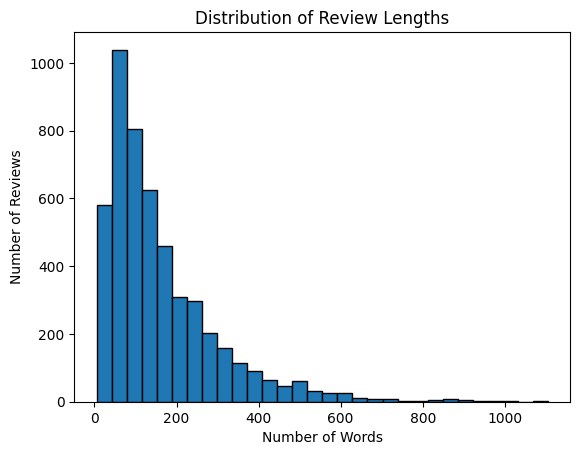

In [3]:
import nltk
import matplotlib.pyplot as plt

# Calculamos la longitud de cada reseña en palabras
review_lengths = [len(nltk.word_tokenize(text)) for text in datos['text']]

# Encontramos la reseña más corta y la más larga
min_length = min(review_lengths)
max_length = max(review_lengths)
shortest_review = datos['text'][review_lengths.index(min_length)]
longest_review = datos['text'][review_lengths.index(max_length)]

print("Shortest review:", shortest_review)
print("Longest review:", longest_review)

# Histograma de la distribución de longitudes
plt.hist(review_lengths, bins=30, edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Number of Reviews')
plt.show()

## Exercise 3
Write a function word_cloud_rating(data, star_value) that constructs a word cloud from the subset of data that exhibit a certain star_value. Visualize the results of
this function for 1-star reviews.
### Answer:

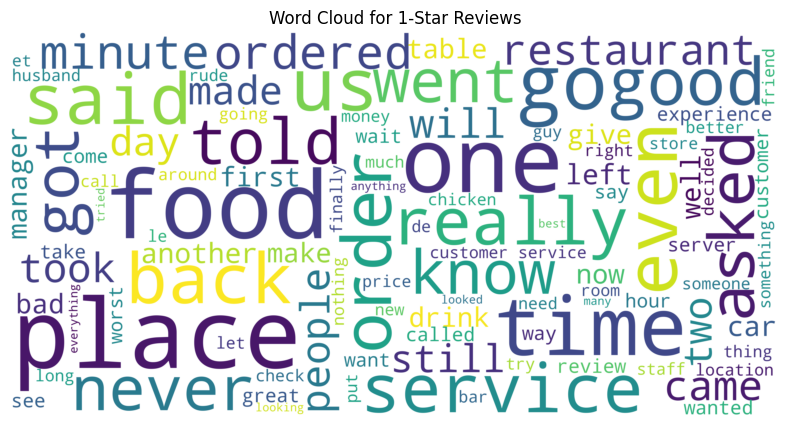

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def word_cloud_rating(datos, star_value):
    subset = datos[datos['stars'] == star_value]
    text = ' '.join(subset['text'])
    wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",
                          scale=10, width=800, height=400).generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {star_value}-Star Reviews")
    plt.show()

# Visualización para reseñas de 1 estrella
word_cloud_rating(datos, 1)

## Exercise 4

The word "good" seems to appear quite frequently in the negative reviews. Investigate why that is and come up with a reasonable explanation.

### Answer:

It is common for the word "good" to appear in negative reviews because reviewers often use it in a comparative or contrasting context, such as "The food was good, but the service was terrible." In these cases, "good" does not indicate a positive review overall, but rather highlights a specific aspect that was acceptable while the rest was unsatisfactory. This shows the importance of analyzing words in context (using n-grams) rather than individually.

## Exercise 5
Find all the high-frequency (top 1%) and low-frequency (bottom 1%) words in the reviews overall. (Hint: import the Counter() function from the collections class.)
### Answer:

In [5]:
from collections import Counter
import numpy as np

# Tokenizamos todas las palabras de todas las reseñas
all_words = []
for review in datos['text']:
    all_words.extend(nltk.word_tokenize(review.lower()))

# Contamos la frecuencia de cada palabra
word_counts = Counter(all_words)
total_words = len(word_counts)
top_1_percent = int(total_words * 0.01)

# Palabras de alta frecuencia (top 1%)
high_freq_words = word_counts.most_common(top_1_percent)
print("High-frequency words (top 1%):")
print([w for w, c in high_freq_words])

# Palabras de baja frecuencia (bottom 1%)
low_freq_words = [w for w, c in word_counts.most_common()[-top_1_percent:]]
print("Low-frequency words (bottom 1%):")
print(low_freq_words)

High-frequency words (top 1%):
['.', 'the', ',', 'and', 'i', 'a', 'to', 'was', 'it', 'of', 'is', 'for', 'in', '!', 'that', 'you', 'my', 'with', 'they', 'but', 'this', 'on', 'we', "'s", "n't", 'have', 'not', 'had', 'so', 'were', 'are', ')', 'at', 'as', 'there', 'be', 'place', '(', 'good', 'me', 'food', 'here', 'if', 'all', 'out', 'just', 'do', 'one', 'very', 'like', 'great', 'would', 'when', 'their', 'up', '...', 'time', 'from', 'or', 'get', 'our', 'really', 'which', 'did', 'some', 'an', 'back', 'also', 'service', 'go', 'what', 'about', 'your', 'can', 'been', 'will', 'more', "'ve", '-', 'no', '?', 'only', 'she', 'well', "'m", 'them', 'by', "''", 'because', '``', 'nice', '$', 'little', 'he', 'ordered', 'other', 'has', ':', 'could', 'than', 'even', 'too', 'us', 'try', 'always', 'came', 'after', 'menu', 'pretty', 'got', 'love', 'order', 'much', 'people', 'first', 'de', 'two', 'never', 'staff', 'restaurant', 'chicken', 'come', "'re", 'bar', 'off', 'best', 'make', 'went', 'definitely', 'frie

## Exercise 6
Write a function called top_k_ngrams(word_tokens, n, k) for printing out the top k n-grams. Use this function to get the top 10 1-grams, 2-grams, and 3-grams from the first 1000 reviews in our dataset.
### Answer:

In [6]:
from nltk.util import ngrams
from collections import Counter

def top_k_ngrams(word_tokens, n, k):
    n_grams = ngrams(word_tokens, n)
    ngram_counts = Counter(n_grams)
    return ngram_counts.most_common(k)

# Tomamos los primeros 1000 reviews
first_1000_reviews = datos['text'][:1000]
tokens = []
for review in first_1000_reviews:
    tokens.extend(nltk.word_tokenize(review.lower()))

print("Top 10 1-grams:", top_k_ngrams(tokens, 1, 10))
print("Top 10 2-grams:", top_k_ngrams(tokens, 2, 10))
print("Top 10 3-grams:", top_k_ngrams(tokens, 3, 10))

Top 10 1-grams: [(('.',), 10812), (('the',), 8623), ((',',), 6198), (('i',), 5953), (('and',), 5587), (('a',), 4846), (('to',), 4403), (('it',), 3333), (('was',), 3069), (('of',), 2876)]
Top 10 2-grams: [(('.', 'i'), 1946), (('.', 'the'), 1508), ((',', 'but'), 867), (('.', 'it'), 725), (('it', "'s"), 694), (('it', 'was'), 643), (('of', 'the'), 603), ((',', 'and'), 603), (('in', 'the'), 536), (('i', 'was'), 535)]
Top 10 3-grams: [(('.', 'it', "'s"), 241), (('.', 'it', 'was'), 194), ((',', 'but', 'i'), 168), (('.', 'i', "'ve"), 163), (('.', 'i', 'was'), 143), (('i', 'do', "n't"), 131), (('.', 'i', "'m"), 120), (('it', "'s", 'a'), 117), (('.', 'the', 'food'), 105), ((',', 'but', 'it'), 103)]


## Exercise 7

### 7.1
Filter out all of the stop words in the first review of the Yelp review data and print out your answer. Additionally, print out (separately) the stopwords you found in this review.
### Answer:

In [7]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))
first_review = datos['text'][0]
tokens = nltk.word_tokenize(first_review.lower())
filtered_words = [w for w in tokens if w.isalpha() and w not in stop_words]
found_stopwords = [w for w in tokens if w in stop_words]

print("Filtered review (without stopwords):", filtered_words)
print("Stopwords found in review:", found_stopwords)

Filtered review (without stopwords): ['super', 'simple', 'place', 'amazing', 'nonetheless', 'around', 'since', 'still', 'serve', 'thing', 'started', 'bologna', 'salami', 'sandwich', 'mustard', 'staff', 'helpful', 'friendly']
Stopwords found in review: ['but', 'it', 'been', 'the', 'and', 'they', 'the', 'same', 'they', 'with', 'a', 'and', 'with', 'was', 'very', 'and']


### 7.2
Modify the function top_k_ngrams(word_tokens, n, k) to remove stop words before determining the top n-grams.
### Answer:

In [8]:
from nltk.corpus import stopwords

def top_k_ngrams_no_stop(word_tokens, n, k):
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [w for w in word_tokens if w.isalpha() and w not in stop_words]
    n_grams = ngrams(filtered_tokens, n)
    ngram_counts = Counter(n_grams)
    return ngram_counts.most_common(k)

# Ejemplo con n=3, k=10
print("Top 10 3-grams (no stopwords):", top_k_ngrams_no_stop(tokens, 3, 10))

Top 10 3-grams (no stopwords): [(('super', 'simple', 'place'), 1), (('simple', 'place', 'amazing'), 1), (('place', 'amazing', 'nonetheless'), 1), (('amazing', 'nonetheless', 'around'), 1), (('nonetheless', 'around', 'since'), 1), (('around', 'since', 'still'), 1), (('since', 'still', 'serve'), 1), (('still', 'serve', 'thing'), 1), (('serve', 'thing', 'started'), 1), (('thing', 'started', 'bologna'), 1)]


## Exercise 8

### 8.1
Divide the data into "good reviews" (i.e. stars rating was greater than 3) and "bad reviews" (i.e. stars rating was less or equal than 3) and make a bar plot of the top 20 words in each case. Are these results different from above?

#### Answer:

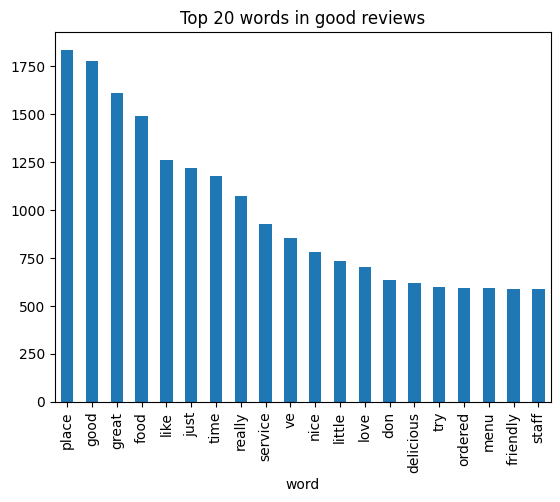

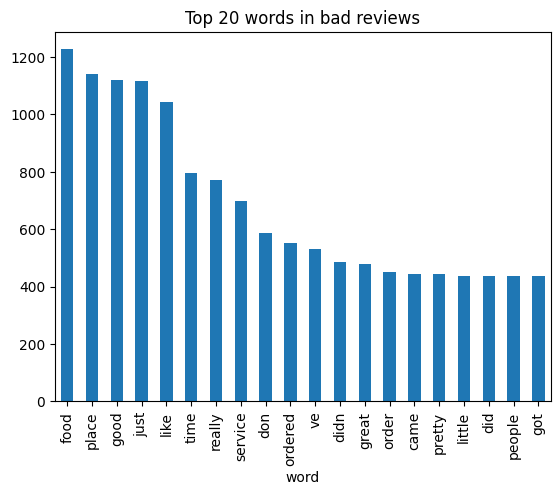

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt

# Dividir reseñas
good_reviews = datos[datos['stars'] > 3]['text']
bad_reviews = datos[datos['stars'] <= 3]['text']

def get_top_n_words(corpus, n=20):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Top 20 palabras en reseñas positivas
top_good = get_top_n_words(good_reviews)
df_good = pd.DataFrame(top_good, columns=['word', 'count'])
df_good.set_index('word').plot(kind='bar', legend=False, title='Top 20 words in good reviews')
plt.show()

# Top 20 palabras en reseñas negativas
top_bad = get_top_n_words(bad_reviews)
df_bad = pd.DataFrame(top_bad, columns=['word', 'count'])
df_bad.set_index('word').plot(kind='bar', legend=False, title='Top 20 words in bad reviews')
plt.show()

Different child the results?
Yes, the results show that the most frequent words in positive reviews are usually general and positive terms, while in the denials related words with problems or insacty.


### 8.2
Use the get_top_n_words() function to find the top 20 bigrams and trigrams (In both, bad and good reviews). Do the results seem useful?

#### Answer:

In [10]:
def get_top_n_ngrams(corpus, ngram=2, top_n=20):
    vec = CountVectorizer(ngram_range=(ngram, ngram), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_n]

# Top 20 bigramas
top_good_bigrams = get_top_n_ngrams(good_reviews, ngram=2)
top_bad_bigrams = get_top_n_ngrams(bad_reviews, ngram=2)
print("Top 20 bigrams in good reviews:", top_good_bigrams)
print("Top 20 bigrams in bad reviews:", top_bad_bigrams)

# Top 20 trigramas
top_good_trigrams = get_top_n_ngrams(good_reviews, ngram=3)
top_bad_trigrams = get_top_n_ngrams(bad_reviews, ngram=3)
print("Top 20 trigrams in good reviews:", top_good_trigrams)
print("Top 20 trigrams in bad reviews:", top_bad_trigrams)

Top 20 bigrams in good reviews: [('really good', np.int64(130)), ('customer service', np.int64(120)), ('make sure', np.int64(117)), ('highly recommend', np.int64(115)), ('ice cream', np.int64(107)), ('staff friendly', np.int64(102)), ('great place', np.int64(99)), ('las vegas', np.int64(96)), ('pretty good', np.int64(87)), ('feel like', np.int64(80)), ('food good', np.int64(70)), ('love place', np.int64(69)), ('great service', np.int64(68)), ('service great', np.int64(67)), ('food great', np.int64(63)), ('really enjoyed', np.int64(61)), ('great food', np.int64(60)), ('happy hour', np.int64(60)), ('good food', np.int64(59)), ('recommend place', np.int64(58))]
Top 20 bigrams in bad reviews: [('customer service', np.int64(107)), ('pretty good', np.int64(82)), ('don know', np.int64(74)), ('happy hour', np.int64(67)), ('food good', np.int64(65)), ('feel like', np.int64(59)), ('don think', np.int64(51)), ('20 minutes', np.int64(50)), ('tasted like', np.int64(49)), ('make sure', np.int64(47))

Are the results useful?
Yes, bigrams and trigrams allow to identify frequent phrases and specific problems, such as waiting times ("20 minute", "15 minute"), which are not detected with individual words.


## Exercise 9

### 9.1 (Only text)
You may have noticed that many of the important "bad" bigrams included the words "like" or "just" but didn't seem very informative (e.g. "felt like", "food just"). Give some ideas of how to use this sort of observation in future pre-processing of reviews, based on the pre-processing ideas we have already studied.

#### Answer:

Custom Stopwords lists can be created that include words like "Like" and "Just" when they do not provide relevant meaning. You can also filter bigrams that contain these words if they do not provide useful context, thus improving the quality of the analysis.


### 9.2 (Only text)
Building on the previous question, we note that most of the most important complaints and compliments can't be completely observed by looking at bigrams or trigrams. This can often be fixed by small modifications. Do the following:
1. Write down a complaint that is unlikely to be (completely) picked up by bigram analysis. Hint: what might you write if your hamburger was served cold?
2. Write down a processing step that would fix this problem. Try to find a solution that would work for several similar problems without additional human input.

#### Answer:

1. Example complaint: "My burger was served cold, and the cheese wasn't melted."
2. Processing step: Implement keyphrase extraction or dependency analysis to identify relationships between words and detect specific problems, such as "burger served cold," without relying solely on n-grams.